In [11]:
import pandas as pd
import numpy as np


In [12]:
import statsmodels.formula.api as sm
import scipy.stats as stats

In [13]:
pd.set_option('display.max_columns', None) ## show all the columns in dataset
pd.set_option('display.max_rows', None) ## show all rows in dataset

In [14]:
from matplotlib import pyplot as plt

%matplotlib inline

In [15]:
import seaborn as sns

In [16]:
df = pd.read_excel("IBM Employee Attrition.xlsx")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [17]:
# missing data
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [19]:
df.shape

(1470, 30)

In [20]:
## Using the z-score method for outlier identification and removal 

## starting shape
print ("starting shape:", df.shape)
## calculate zscores
df["zscore_Age"] = np.abs(stats.zscore(df["Age"]))
df["zscore_DistanceFromHome"] = np.abs(stats.zscore(df["DistanceFromHome"]))
df["zscore_Education"] = np.abs(stats.zscore(df["Education"]))
df["zscore_EmployeeNumber"] = np.abs(stats.zscore(df["EmployeeNumber"]))
df["zscore_EnvironmentSatisfaction"] = np.abs(stats.zscore(df["EnvironmentSatisfaction"]))
df["zscore_JobInvolvement"] = np.abs(stats.zscore(df["JobInvolvement"]))
df["zscore_JobLevel"] = np.abs(stats.zscore(df["JobLevel"]))
df["zscore_JobSatisfaction"] = np.abs(stats.zscore(df["JobSatisfaction"]))
df["zscore_MonthlyIncome"] = np.abs(stats.zscore(df["MonthlyIncome"]))
df["zscore_NumCompaniesWorked"] = np.abs(stats.zscore(df["NumCompaniesWorked"]))
df["zscore_PercentSalaryHike"] = np.abs(stats.zscore(df["PercentSalaryHike"]))
df["zscore_PerformanceRating"] = np.abs(stats.zscore(df["PerformanceRating"]))
df["zscore_RelationshipSatisfaction"] = np.abs(stats.zscore(df["RelationshipSatisfaction"]))
df["zscore_StockOptionLevel"] = np.abs(stats.zscore(df["StockOptionLevel"]))
df["zscore_TotalWorkingYears"] = np.abs(stats.zscore(df["TotalWorkingYears"]))
df["zscore_TrainingTimesLastYear"] = np.abs(stats.zscore(df["TrainingTimesLastYear"]))
df["zscore_WorkLifeBalance"] = np.abs(stats.zscore(df["WorkLifeBalance"]))
df["zscore_YearsAtCompany"] = np.abs(stats.zscore(df["YearsAtCompany"]))
df["zscore_YearsInCurrentRole"] = np.abs(stats.zscore(df["YearsInCurrentRole"]))
df["zscore_YearsSinceLastPromotion"] = np.abs(stats.zscore(df["YearsSinceLastPromotion"]))
df["zscore_YearsWithCurrManager"] = np.abs(stats.zscore(df["YearsWithCurrManager"]))

###

starting shape: (1470, 30)


In [21]:
## determine rows with outliers for birthweight and drop

In [23]:
## 
Age_outliers = df[df["zscore_Age"] > 3].index
df = df.drop(Age_outliers)

## 
DistanceFromHome_outliers = df[df["zscore_DistanceFromHome"] > 3].index
df = df.drop(DistanceFromHome_outliers)

## 
Education_outliers = df[df["zscore_Education"] > 3].index
df = df.drop(Education_outliers)

## 
EmployeeNumber_outliers = df[df["zscore_EmployeeNumber"] > 3].index
df = df.drop(EmployeeNumber_outliers)

## 
EnvironmentSatisfaction_outliers = df[df["zscore_EnvironmentSatisfaction"] > 3].index
df = df.drop(EnvironmentSatisfaction_outliers)

## 
JobInvolvement_outliers = df[df["zscore_JobInvolvement"] > 3].index
df = df.drop(JobInvolvement_outliers)

## 
JobSatisfaction_outliers = df[df["zscore_JobSatisfaction"] > 3].index
df = df.drop(JobSatisfaction_outliers)

## 
JobLevel_outliers = df[df["zscore_JobLevel"] > 3].index
df = df.drop(JobLevel_outliers)

## 
MonthlyIncome_outliers = df[df["zscore_MonthlyIncome"] > 3].index
df = df.drop(MonthlyIncome_outliers)

## 
NumCompaniesWorked_outliers = df[df["zscore_NumCompaniesWorked"] > 3].index
df = df.drop(NumCompaniesWorked_outliers)

## 
PercentSalaryHike_outliers = df[df["zscore_PercentSalaryHike"] > 3].index
df = df.drop(PercentSalaryHike_outliers)

## 
PerformanceRating_outliers = df[df["zscore_PerformanceRating"] > 3].index
df = df.drop(PerformanceRating_outliers)

## 
RelationshipSatisfaction_outliers = df[df["zscore_RelationshipSatisfaction"] > 3].index
df = df.drop(RelationshipSatisfaction_outliers)

## 
StockOptionLevel_outliers = df[df["zscore_StockOptionLevel"] > 3].index
df = df.drop(StockOptionLevel_outliers)

## 
TotalWorkingYears_outliers = df[df["zscore_TotalWorkingYears"] > 3].index
df = df.drop(TotalWorkingYears_outliers)

## 
TrainingTimesLastYear_outliers = df[df["zscore_TrainingTimesLastYear"] > 3].index
df = df.drop(TrainingTimesLastYear_outliers)

## 
WorkLifeBalance_outliers = df[df["zscore_WorkLifeBalance"] > 3].index
df = df.drop(WorkLifeBalance_outliers)

## 
YearsWithCurrManager_outliers = df[df["zscore_YearsWithCurrManager"] > 3].index
df = df.drop(YearsWithCurrManager_outliers)

In [24]:
## ending shape; dropping zscore columns
df.drop(columns=["zscore_Age", "zscore_DistanceFromHome", "zscore_Education", "zscore_EmployeeNumber", "zscore_EnvironmentSatisfaction", "zscore_JobInvolvement", "zscore_JobLevel", "zscore_JobSatisfaction", "zscore_MonthlyIncome", "zscore_NumCompaniesWorked", "zscore_PercentSalaryHike", "zscore_PerformanceRating", "zscore_RelationshipSatisfaction", "zscore_StockOptionLevel", "zscore_TotalWorkingYears", "zscore_TrainingTimesLastYear", "zscore_WorkLifeBalance", "zscore_YearsAtCompany", "zscore_YearsInCurrentRole", "zscore_YearsWithCurrManager"], inplace=True)


print ("shape after outliers removed:", df.shape)

shape after outliers removed: (1441, 31)


# Exploratory data analysis 

In [ ]:

## you should explore every aspect of the data to determine the features of the data, 
## the range of values for all variables of interest, and the relationships between variables.
## Exploration should be conducted outside of predictive modeling – 
##  in other words, you are not only interested in how the dependent and independent variables interact – 
##  you should also spend some time exploring variations in the data among variables 
##  (i.e. how does salary differ between genders? 
##  Does time spent in the company differ by job role?)

In [25]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.679146
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0.368715
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.679146
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.252146
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0.058285


In [26]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_YearsSinceLastPromotion
count,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000
mean,36.655101,9.153366,2.900069,1027.734212,2.716863,2.727273,2.030534,2.732130,6351.108258,2.678695,15.210271,3.152672,2.709924,0.798751,10.893824,2.805690,2.761277,6.759195,4.133241,2.097849,3.968078,0.709751
std,8.973634,8.079600,1.024563,601.813103,1.090515,0.711912,1.080334,1.101326,4566.997652,2.494471,3.644182,0.359796,1.080364,0.854578,7.283484,1.287653,0.707047,5.758776,3.552427,3.099418,3.361189,0.649940
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.058285
25%,30.000000,2.000000,2.000000,493.000000,2.000000,2.000000,1.000000,2.000000,2889.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.368715
50%,35.000000,7.000000,3.000000,1026.000000,3.000000,3.000000,2.000000,3.000000,4876.000000,2.000000,14.000000,3.000000,3.000000,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.679146
75%,42.000000,14.000000,4.000000,1558.000000,4.000000,3.000000,3.000000,4.000000,7969.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.679146
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,34.000000,6.000000,4.000000,33.000000,18.000000,15.000000,14.000000,3.977310


In [27]:
df["Attrition"].value_counts()

No     1206
Yes     235
Name: Attrition, dtype: int64

In [28]:
df["Gender"].value_counts()

Male      863
Female    578
Name: Gender, dtype: int64

In [30]:
## relationship between Gender and attrition
pd.crosstab(df["Gender"], df["Attrition"]) 

Attrition,No,Yes
Gender,,
Female,492,86
Male,714,149


In [31]:
## relationship between JobInvolvement and attrition
pd.crosstab(df["JobInvolvement"], df["Attrition"]) 
	

Attrition,No,Yes
JobInvolvement,,
1,54,28
2,298,71
3,727,123
4,127,13


In [32]:
## relationship between JobInvolvement and attrition
pd.crosstab(df["YearsAtCompany"], df["Attrition"]) 
	

Attrition,No,Yes
YearsAtCompany,,
0,28,16
1,112,59
2,100,27
3,108,20
4,91,19
5,174,21
6,66,9
7,77,11
8,71,9


In [33]:
df["JobSatisfaction"].groupby(df["Gender"]).mean() 
#JobSatisfaction is higher for the males 

Gender
Female    2.679931
Male      2.767092
Name: JobSatisfaction, dtype: float64

In [34]:
df["YearsAtCompany"].groupby(df["JobRole"]).mean() 
#There is a difference between job roles whereas Sales representative being the lowest and Manager being the highest

JobRole
Healthcare Representative     8.023256
Human Resources               5.326923
Laboratory Technician         4.871094
Manager                      13.758242
Manufacturing Director        7.545455
Research Director            10.283784
Research Scientist            5.061856
Sales Executive               7.372671
Sales Representative          2.915663
Name: YearsAtCompany, dtype: float64

In [35]:
pd.crosstab(df["JobRole"], df["Attrition"])

Attrition,No,Yes
JobRole,,
Healthcare Representative,121,8
Human Resources,40,12
Laboratory Technician,194,62
Manager,86,5
Manufacturing Director,133,10
Research Director,73,1
Research Scientist,244,47
Sales Executive,265,57
Sales Representative,50,33


In [37]:
df["YearsAtCompany"].groupby(df["Attrition"]).mean() 
#More years at the company means the lower attrition

Attrition
No     7.126866
Yes    4.872340
Name: YearsAtCompany, dtype: float64

In [42]:
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
bin_labels = ["1000", "2000", "3000", "4000", "5000", "6000", "7000", "8000", "9000", "10000+"]
df["MonthlyIncome_Groups"] = pd.cut(df["MonthlyIncome"], bins, labels = bin_labels)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_YearsSinceLastPromotion,MonthlyIncome_Groups
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.679146,6000
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0.368715,6000
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.679146,3000
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.252146,3000
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0.058285,4000


In [46]:
# # Young adult = 18.1 -25
# Mid Adult = 25.1 - 30
# Adult = 30.1 - 50
# Senior = 50+

#### STEP 1: create the bin limits 
bins = [25, 30, 50, 60]
    
## the bin limits are the cutoff points for the values
## each number shown is the cutoff for a specific group (0-60, 60.1 - 70, 70.1 - 80...)
bin_labels = ["Young adult", "Mid Adult", "Adult"]
## the bin labels are the group names that will be created
## there should always be one less group than bins
#### STEP 2: apply your bins to a specific column (or create new column) in dataset 
## new column = pd.cut(column to apply to, bin cutoff list, labels = list of bin labels)
# pd.cut function segments and organizes values into the appropriate bin
df["Age Group"] = pd.cut(df["Age"], bins, labels = bin_labels)
#### STEP 3: check changes,
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_YearsSinceLastPromotion,MonthlyIncome_Groups,Age Group
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.679146,6000,Mid Adult
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0.368715,6000,Mid Adult
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.679146,3000,Mid Adult
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.252146,3000,Mid Adult
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0.058285,4000,Young adult
5,32,No,Travel_Frequently,Research & Development,2,2,Life Sciences,8,4,Male,3,1,Laboratory Technician,4,Single,3068,0,Y,No,13,3,3,0,8,2,2,7,7,3,6,0.252146,4000,Mid Adult
6,59,No,Travel_Rarely,Research & Development,3,3,Medical,10,3,Female,4,1,Laboratory Technician,1,Married,2670,4,Y,Yes,20,4,1,3,12,3,2,1,0,0,0,0.679146,3000,Adult
7,30,No,Travel_Rarely,Research & Development,24,1,Life Sciences,11,4,Male,3,1,Laboratory Technician,3,Divorced,2693,1,Y,No,22,4,2,1,1,2,3,1,0,0,0,0.679146,3000,Young adult
8,38,No,Travel_Frequently,Research & Development,23,3,Life Sciences,12,4,Male,2,3,Manufacturing Director,3,Single,9526,0,Y,No,21,4,2,0,10,2,3,9,7,1,8,0.368715,10000+,Mid Adult
9,36,No,Travel_Rarely,Research & Development,27,3,Medical,13,3,Male,3,2,Healthcare Representative,3,Married,5237,6,Y,No,13,3,2,2,17,3,2,7,7,7,7,1.493867,6000,Mid Adult


In [43]:
pd.crosstab(df["MonthlyIncome_Groups"], df["Attrition"])

Attrition,No,Yes
MonthlyIncome_Groups,,
2000,15,18
3000,266,95
4000,123,24
5000,178,26
6000,149,16
7000,110,11
8000,46,7
9000,42,6
10000+,43,9


# Modeling

In [ ]:
#after thoroughly exploring the data, 
#create a logistic regression model that predicts employee attrition based on the other variables available to you. 
#Clearly interpret your model findings. 
#Re-run/tweak your model if you think you can find a better fit. 

No     1206
Yes     235
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

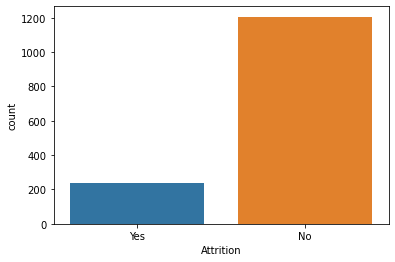

In [44]:
###

print(df["Attrition"].value_counts())

###

sns.countplot(data = df, x = "Attrition")

In [ ]:
#replace some values in the columsn from whatever they are into 1s & 0s. 


In [47]:
df["Attrition"].replace(["Yes","No"],[1, 0], inplace = True)

In [48]:
df["Gender"].replace(["Male","Female"],[1, 0], inplace = True)

In [49]:
df["OverTime"].replace(["Yes","No"],[1, 0], inplace = True)

In [50]:
mod1 = sm.logit('Attrition ~ Age + Education + Gender + JobSatisfaction + MonthlyIncome + OverTime + TotalWorkingYears + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion', data=df).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.375065
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1441
Model:                          Logit   Df Residuals:                     1430
Method:                           MLE   Df Model:                           10
Date:                Thu, 01 Dec 2022   Pseudo R-squ.:                  0.1567
Time:                        15:59:50   Log-Likelihood:                -540.47
converged:                       True   LL-Null:                       -640.88
Covariance Type:            nonrobust   LLR p-value:                 1.092e-37
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.4938      0.437      1.130      0.259      -0.363       1.351
Age                        -0.0339      0.012     -2.818      0.005      -0.058      -0.010
Education                   0.0296      0.077      0.386      0.700      -0.121       0.180
Gender                      0.2563      0.161      1.591      0.112      -0.059       0.572
JobSatisfaction            -0.3176      0.070     -4.563      0.000      -0.454      -0.181
MonthlyIncome           -6.811e-05   3.23e-05     -2.111      0.035      -0.000   -4.88e-06
OverTime                    1.4938      0.159      9.400      0.000       1.182       1.805
TotalWorkingYears          -0.0193      0.024     -0.809      0.419      -0.066       0.028
YearsAtCompany             -0.0160      0.032     -0.505      0.614      -0.078       0.046
YearsInCurrentRole         -0.1512      0.040     -3.765      0.000      -0.230      -0.072
YearsSinceLastPromotion     0.1429      0.038      3.751      0.000       0.068       0.218
===========================================================================================
"""

In [51]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

df_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

df_odds["Sig"] = np.where(df_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df_odds

,OR,pvalue,Sig
Intercept,1.638581,2.585760e-01,Not Sig
Age,0.966628,4.837319e-03,Sig
Education,1.030063,6.996484e-01,Not Sig
Gender,1.292085,1.116018e-01,Not Sig
JobSatisfaction,0.727866,5.053155e-06,Sig
MonthlyIncome,0.999932,3.476280e-02,Sig
OverTime,4.454001,5.438226e-21,Sig
TotalWorkingYears,0.980864,4.186856e-01,Not Sig
YearsAtCompany,0.984171,6.136611e-01,Not Sig
YearsInCurrentRole,0.859671,1.665470e-04,Sig


In [ ]:
sns.barplot(data = df, x = "Gender", y = "Salary", ci = None)
plt.title('Relationship between salary and gender')

plt.minorticks_on() 